# Introduction
Fraud detection is a set of processes and analyses that allow businesses to identify and prevent unauthorized financial activity. In this project, we are working with Blossom Bank dataset, which is known as BB PLC and is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

# Problem statement
Because so many clients use online banking, fraud involving online transactions has long been a problem for banks and other financial institutions. In this project, Blossom Bank has to build machine learning model to predict online payment fraud.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data = pd.read_csv('Online Payment Fraud Detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


#### Features in the Dataset

* step: represents a unit of time where 1 step equals 1hour

* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of the recipient after the transaction
* isFraud: fraud transaction

In [4]:
#inspect the data
data.shape

(1048575, 10)

### There are 1048575 rows and 10 columns in the dataset

In [5]:
# transpose statistic summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1048575.0,2.696617e+01,1.562325e+01,1.0,15.000,20.00,39.000,95.0
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0
isFraud,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.0


In [6]:
# checking for missing value
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


#### No missing value in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [8]:
# Create a function to create proper labels for the 'isfraud feature'

def isFraud(x):
    if x == 1: 
        return 'Fraud'
    else:
        return 'Not Fraud'
    
data['isFraud_label'] = data['isFraud'].apply(isFraud)


In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFraud_label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


### Fraud Rate
* What is the percentage of fraudulent and non fraudulent transaction

In [10]:
fraud_percentage = (data['isFraud_label'].value_counts()/data.shape[0]*100).round(2)
fraud_percentage

Not Fraud    99.89
Fraud         0.11
Name: isFraud_label, dtype: float64

In [11]:
isFraud_count = data.groupby('isFraud_label')['isFraud_label'].count()
isFraud_count

isFraud_label
Fraud           1142
Not Fraud    1047433
Name: isFraud_label, dtype: int64

## Data Visualization
* Univariant
* Bivariant
* Multivariant
* Correlation Matrix

Text(0, 0.5, 'Count of Fraud')

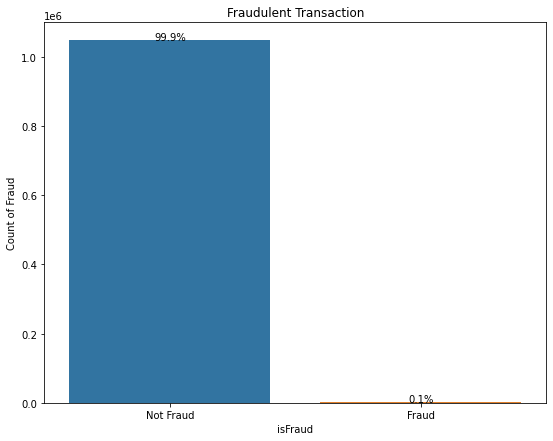

In [12]:
# Univariant visualization of isfraud label
plt.figure(figsize=(9,7))
plt.title('Fraudulent Transaction')
ax=sns.countplot(x='isFraud_label', data=data)

for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
   s="{:.1f}%".format(100 * p.get_height()/len(data)),
      ha='center')

plt.xlabel('isFraud')
plt.ylabel('Count of Fraud')

##### 99.9% of the transaction is not fraud while 0.1% transaction is fraud

Text(0, 0.5, 'Count of Online Transaction')

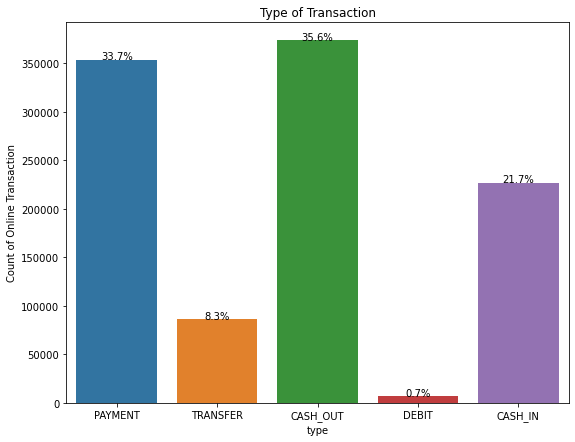

In [16]:
plt.figure(figsize=(9,7))
plt.title('Type of Transaction')
ax=sns.countplot(x='type', data=data)
for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
   s="{:.1f}%".format(100 * p.get_height()/len(data)),
      ha='center')
plt.xlabel('type')
plt.ylabel("Count of Online Transaction")

CASH_OUT as the highest type with 35.6% while DEBIT has the lowest transaction type with 0.7%

<AxesSubplot:title={'center':'step'}, xlabel='step', ylabel='Density'>

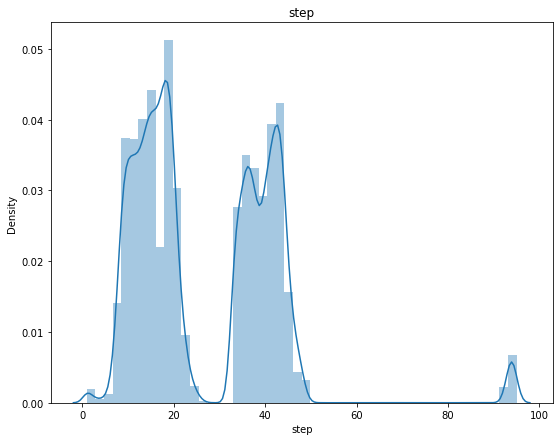

In [14]:
plt.figure(figsize=(9,7))
plt.title('step')

sns.distplot(data['step'])

<AxesSubplot:title={'center':'amount'}, xlabel='amount', ylabel='Density'>

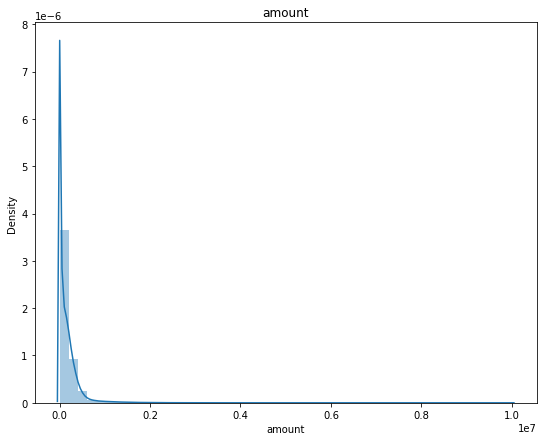

In [15]:
plt.figure(figsize=(9,7))
plt.title('amount')

sns.distplot(data['amount'])

#### Bivariant Visualization

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


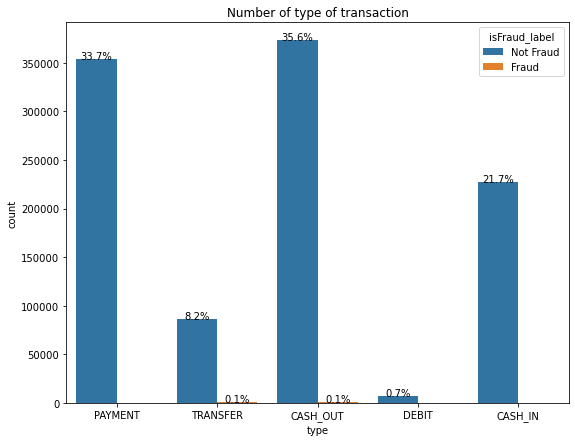

In [17]:
# visualization of 
plt.figure(figsize=(9,7))
plt.title('Number of type of transaction')
ax=sns.countplot(x='type', data=data, hue='isFraud_label')

for p in ax.patches:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
   s="{:.1f}%".format(100 * p.get_height()/len(data)),
      ha='center')


<AxesSubplot:xlabel='amount', ylabel='step'>

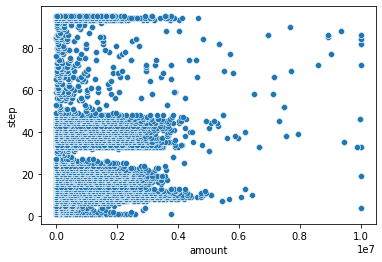

In [18]:
# visualization between amount and step
sns.scatterplot(x=data['amount'], y=data['step'])

Text(0, 0.5, 'isFraud_label')

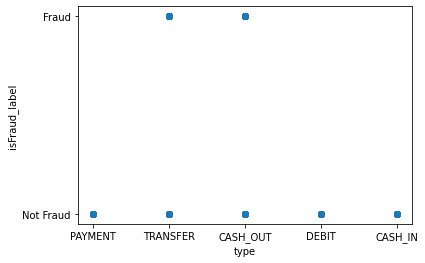

In [19]:
# scatterplot visualization between type and isfraud
plt.scatter(x='type',y='isFraud_label',data=data)
plt.xlabel('type')
plt.ylabel('isFraud_label')

Text(0, 0.5, 'isFraud_label')

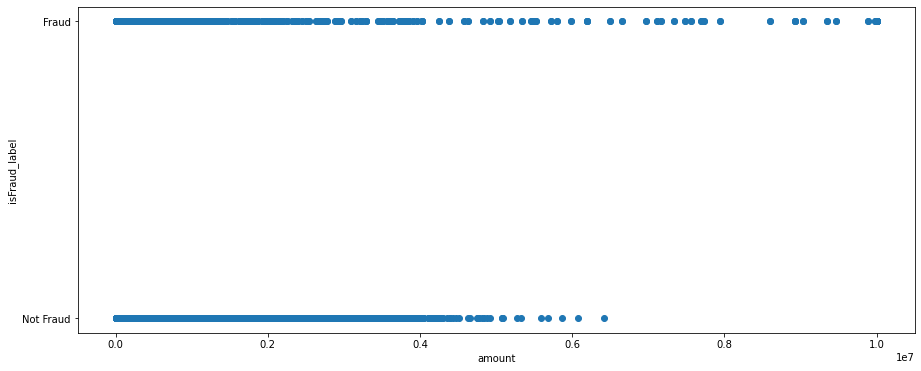

In [20]:
# visualization between amount and isfraud
plt.figure(figsize=(15,6))
plt.scatter(x='amount',y='isFraud_label',data=data)
plt.xlabel('amount')
plt.ylabel('isFraud_label')


### Multivariant 

<AxesSubplot:xlabel='type', ylabel='step'>

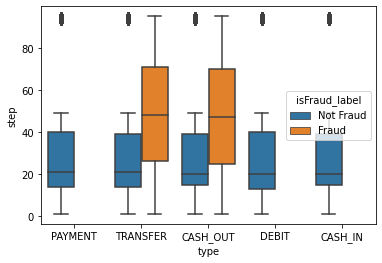

In [21]:
# visualization between type, step and isFraud
sns.boxplot(x= "type", y= "step", hue ="isFraud_label", data= data)


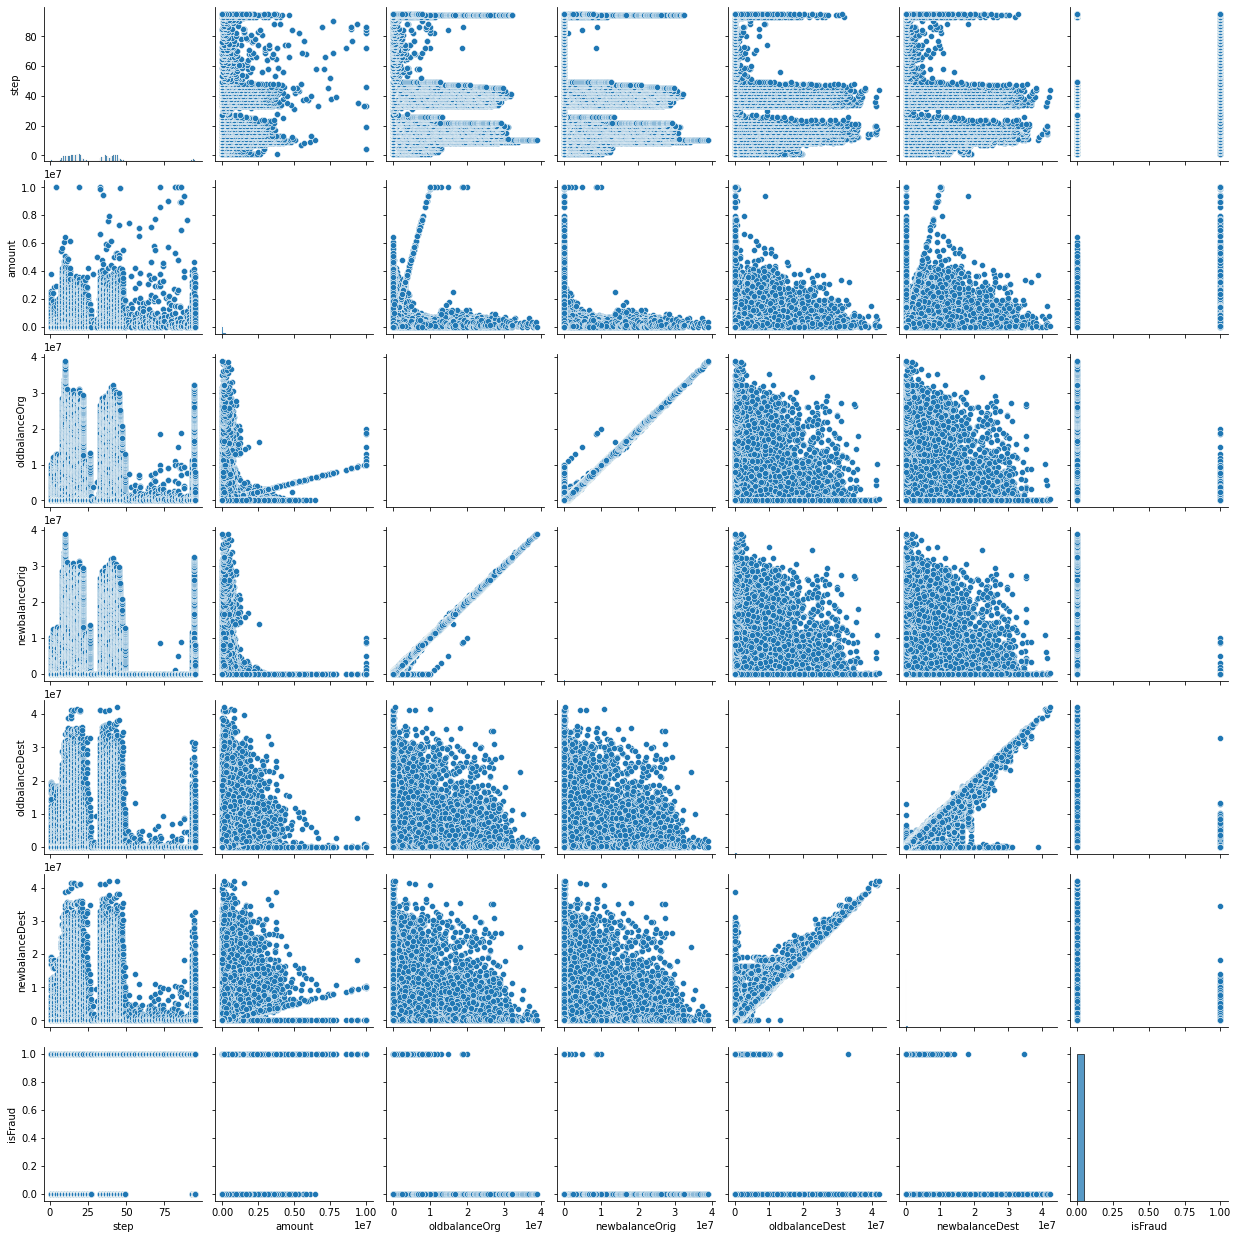

In [22]:
sns.pairplot(data)

### Correlation

Text(0.5, 1.0, 'correlation between the columns')

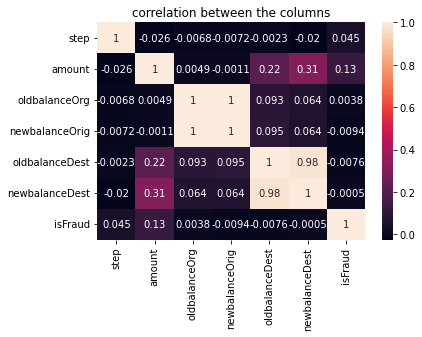

In [23]:
corel = data.corr()
sns.heatmap(corel,annot=True)
plt.title('correlation between the columns')

#### Feature Engineering & One Hot Encoding

In [24]:
categorical = ['type']

In [25]:
# use pd.get_dummies for one hot encoding
categories_dummies = pd.get_dummies(data[categorical])
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [26]:
# join the encoded variable back to the main dataframe
data = pd.concat([data,categories_dummies], axis=1)
print(data.shape)
data.head()

(1048575, 16)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFraud_label,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud,0,0,0,1,0


In [27]:
data.drop(categorical, axis = 1, inplace = True)

data.drop(columns=['isFraud_label','nameOrig','nameDest'], inplace=True)


#### Select the Target

In [28]:
y=data['isFraud']

### Select Features

In [29]:
X=data.drop('isFraud', axis=1)

In [30]:
X.shape,y.shape

((1048575, 11), (1048575,))

### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Import  ML algorithms

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()

In [35]:
LR.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation
* Accuracy
* Confusion Metrics
* Precision
* Recall

In [36]:
# accuracy score
LR.score(X_test, y_test)

0.9989604956560163

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, plot_confusion_matrix

In [38]:
y_pred = LR.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.55      0.34      0.42       349

    accuracy                           1.00    314573
   macro avg       0.78      0.67      0.71    314573
weighted avg       1.00      1.00      1.00    314573



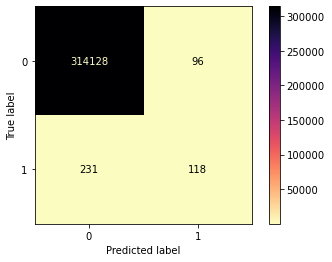

In [40]:
# confusion matrix
plot_confusion_matrix(LR,X_test, y_test,cmap=plt.cm.magma_r)

#### True Positive Rate = TP/P= TN/TP+FN
#### False Negative Rate = FN/P= FN/FN+TP

In [41]:
TP=314128
FN= 231
TN= 118
FP= 96

In [42]:
# The True Positive Rate (TPR) for the Logistic Regression Model

TPR=(TN/(TP+FN))*100

TPR

0.03753670166911079

In [43]:
# The False Negative Rate (FNR) for the Logistic Regression Model

FNR=(FN/(TP+FN))*100

FNR

0.07348286513190333


The False Negative Rate has the highest Percentage for the Logistic Regression Model.



### KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KN = KNeighborsClassifier()


In [46]:
KN.fit(X_train, y_train)

KNeighborsClassifier()

### Model Evaluation
* Accuracy
* Confusion Metrics
* Precision
* Recall

In [47]:
# Accuracy score
KN.score(X_test, y_test)

0.9993515018771477

In [48]:
y_pred = KN.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.81      0.54      0.65       349

    accuracy                           1.00    314573
   macro avg       0.91      0.77      0.82    314573
weighted avg       1.00      1.00      1.00    314573



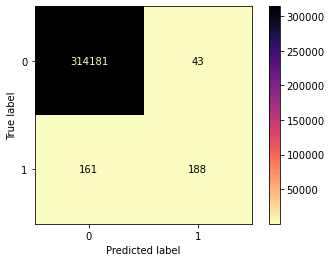

In [50]:
plot_confusion_matrix(KN,X_test, y_test,cmap=plt.cm.magma_r)

In [51]:
TP=314181
FN= 161
TN= 188
FP= 43

In [52]:
# The True Positive Rate (TPR) for theKNeighbors Classifier Model

TPR=(TN/(TP+FN))*100

TPR

0.05980747084385796

In [53]:
# The False Negative Rate (FNR) for the KNeighbors Classifier Model

FNR=(FN/(TP+FN))*100

FNR

0.05121810003117623

The True Positive Rate has the highest Percentage for the Kneighbor Classifier Model.

### DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
DC = DecisionTreeClassifier()

In [56]:
DC.fit(X_train, y_train)

DecisionTreeClassifier()

### Model Evaluation
* Accuracy
* Confusion Metrics
* Precision
* Recall

In [57]:
DC.score(X_test, y_test)

0.999589920304667

In [58]:
y_pred = DC.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.82      0.81      0.81       349

    accuracy                           1.00    314573
   macro avg       0.91      0.90      0.91    314573
weighted avg       1.00      1.00      1.00    314573



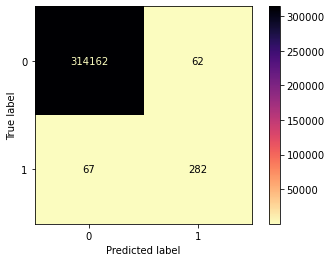

In [60]:
plot_confusion_matrix(DC,X_test, y_test,cmap=plt.cm.magma_r)

In [61]:
TP=314165
FN= 67
TN= 282
FP= 59

In [62]:
# The True Positive Rate (TPR) for the Decision Tree Model

TPR=(TN/(TP+FN))*100

TPR

0.08974261055525853

In [63]:
# The False Negative Rate (FNR) for the Decision Tree Model

FNR=(FN/(TP+FN))*100

FNR

0.02132182591206497

The True Positive Rate has the highest Percentage for the Decision Tree Model.

#### RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
RF = RandomForestClassifier()

In [67]:
RF.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaluation
* Accuracy
* Precision
* Recall
* Confusion Matrixs

In [68]:
RF.score(X_test, y_test)

0.9997456870106461

In [69]:
# model evaluation for RandomForestClassifier
y_pred = RF.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       0.95      0.81      0.88       349

    accuracy                           1.00    314573
   macro avg       0.97      0.91      0.94    314573
weighted avg       1.00      1.00      1.00    314573



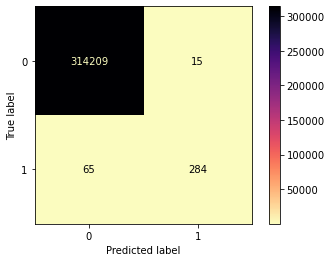

In [71]:
plot_confusion_matrix(RF,X_test, y_test,cmap=plt.cm.magma_r)

In [72]:
TP=314211
FN= 67
TN= 283
FP= 13

In [73]:
# The True Positive Rate (TPR) for the Random Forest Model

TPR=(TN/(TP+FN))*100

TPR

0.09004766480631797

In [74]:
# The False Negative Rate (FNR) for the Random Forest Model

FNR=(FN/(TP+FN))*100

FNR

0.021318705095488708

The True Positive Rate has the highest Percentage for the Random Forest Model.

#### Cross Validation

In [75]:
from sklearn.model_selection import KFold

In [76]:
X = data[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'step']].values
y = data['isFraud'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(np.mean(scores))

0.9989109028920202


In [77]:
X = data[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'step']].values
y = data['isFraud'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(np.mean(scores))

0.9994287485396848


In [78]:
X = data[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'step']].values
y = data['isFraud'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(np.mean(scores))

0.9994468683689769


### Cross Validation for RandomForest

In [79]:
from sklearn.ensemble import RandomForestClassifier
X = data[['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'step']].values
y = data['isFraud'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(np.mean(scores))

0.9994449610185251


# Discussion

After evaluating the exploratory data, it is evident that the Blossom Bank dataset is unbalanced, with a Not-Fraud rate of 99.9% and a Fraud rate of 0.1%.

Logistic Regression, K Neighbors, Decision Tree, and Random Forest have accuracy scores of 0.9986, 0.9993, 0.9996, and 0.9997, respectively. Because the accuracy rating is the same. As a result, accuracy is not an appropriate criteria for determining which model works best.
When compared to the other models employed in this project, Random Forest has the highest precision of 95% and recall of 81%. The recall of the decision tree is 81%.
It is therefore necessary to check further the f1 scores for each model. With an f1 score of 87%, Random Forest had the best performance, followed by Decision Tree with an f1 score of 83%.
In Logistics Regression and KNeighbor, the percentages for F1 scores were very low.




### Conclusion


It is clear that the F1 score is useful when dealing with an unbalanced dataset. As a result, the Random Forest model with an F1 score of 88% performed the best in assisting Blossom Bank in identifying fraudulent online transactions. Therefore, Blossom Bank should be more focused with improving True Positives performance.
